$${\Huge \text{Projectile Motion} }$$

[Useful Link](https://en.wikipedia.org/wiki/Projectile_motion)

$${\large
\begin{equation}
\textbf{a} = \textbf{g} = -g \textbf{e}_\text{y}
\end{equation}
\quad \longrightarrow \quad \begin{cases} \ddot{x} = 0 \quad \longrightarrow \quad \dot{x}(t) = \dot{x}_\text{o} \quad \longrightarrow \quad x(t) = \dot{x}_\text{o} t + x_\text{o}
\\ \\
\ddot{y} = -g \longrightarrow \quad \dot{y}(t) = -gt + \dot{y}_\text{o} \quad \longrightarrow \quad y(t) = - {1\over2}gt^2 + \dot{y}_\text{o} t + y_\text{o}
\end{cases}
}
$$



$${\large
\begin{equation}
\textbf{v}_\text{o} = v_\text{o}\cos\theta_\text{o}\textbf{e}_\text{x} + v_\text{o}\sin\theta_\text{o}\textbf{e}_\text{y}
\end{equation}
\quad \longrightarrow \quad \begin{cases} \dot{x}_\text{o} = v_\text{o}\cos\theta_\text{o}
\\ \\
\dot{y}_\text{o} = v_\text{o}\sin\theta_\text{o}
\end{cases}
}
$$

${\large \text{Some useful information:}}$

In [43]:
import numpy as np

g = 9.8 # m/s^2
v_o = 40 # m/s
theta_o = 0 # degree
x_o = 0
y_o = 0

v_x_o = v_o * np.cos(np.pi * theta_o / 180.0)
v_y_o = v_o * np.sin(np.pi * theta_o / 180.0)


T = 2 * v_o * np.sin(np.pi * theta_o / 180.0) / g # Final time
if theta_o == 0:
    T = 1.0/v_x_o 

Nt = 50 # Number of temporal nodes
t = np.linspace(0, T, Nt + 1)

x = v_x_o * t + np.ones(len(t)) * x_o
y = - 0.5 * g * t **2 + v_y_o * t + np.ones(len(t)) * y_o


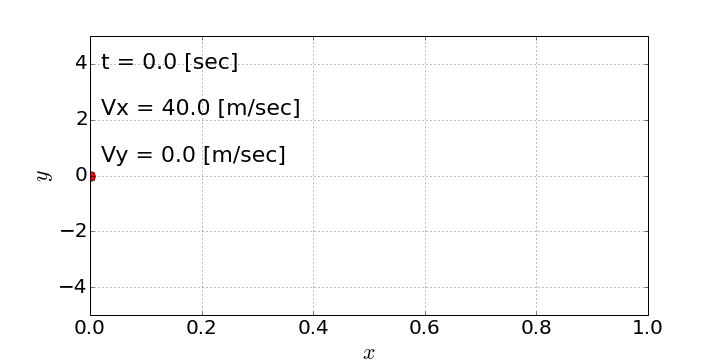
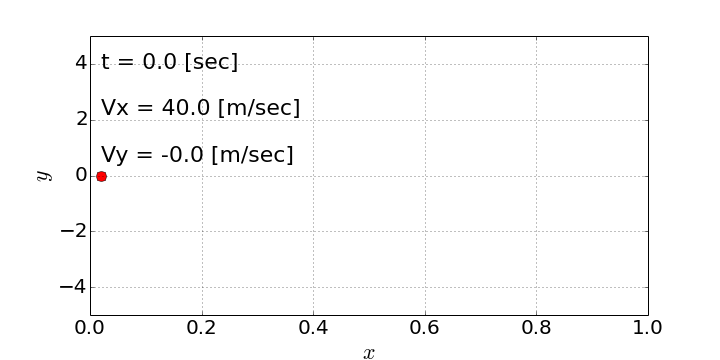
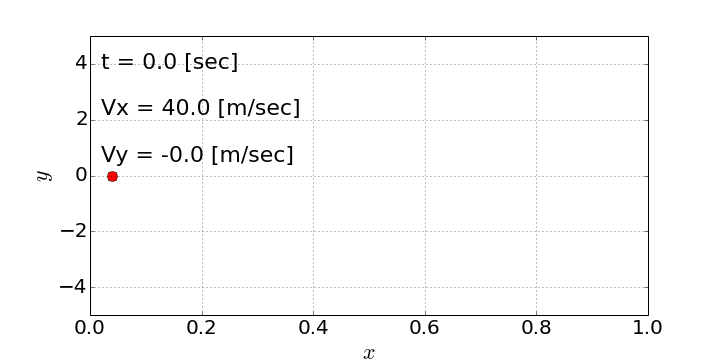
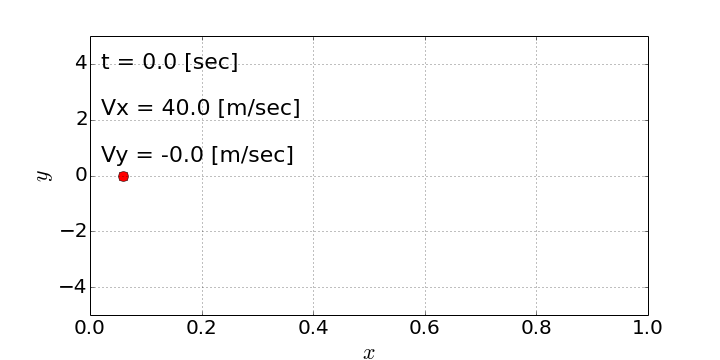
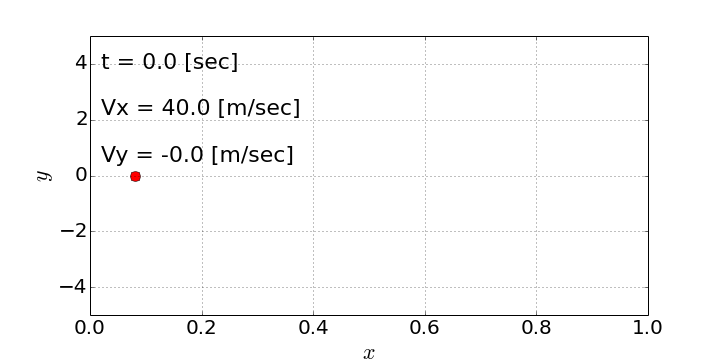
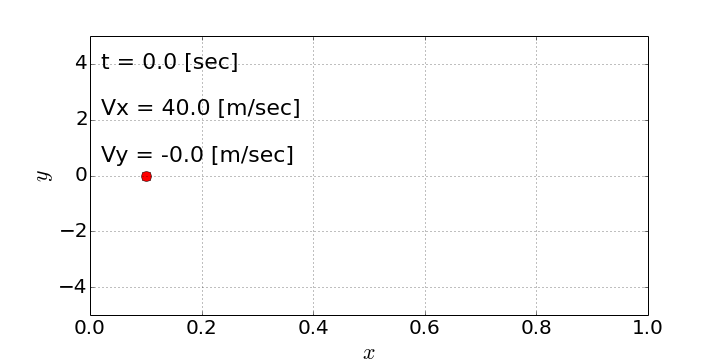
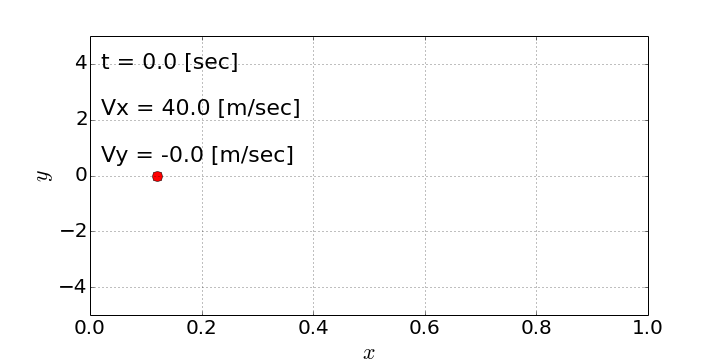
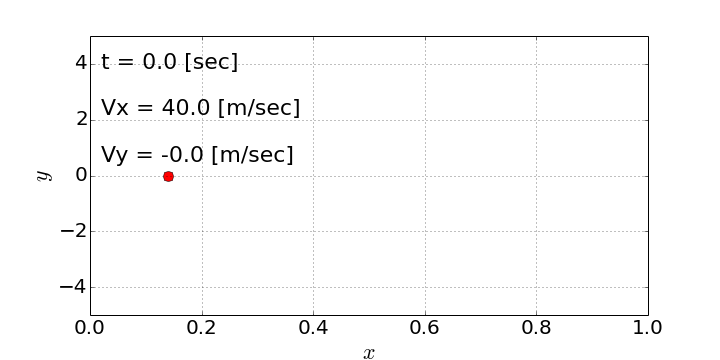
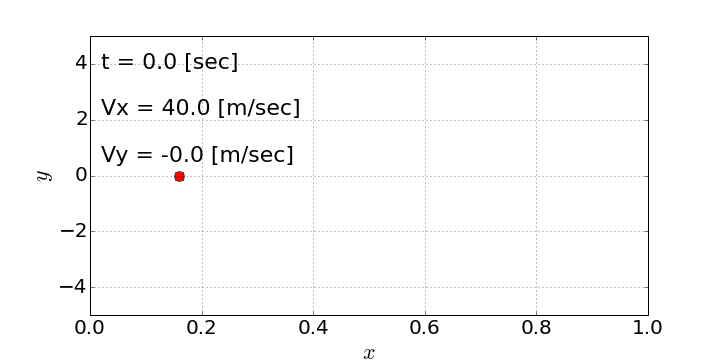
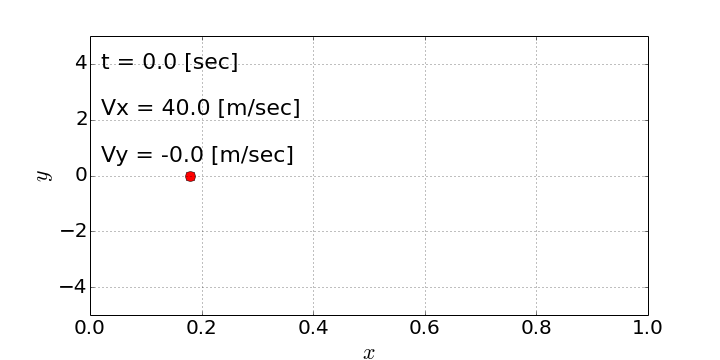
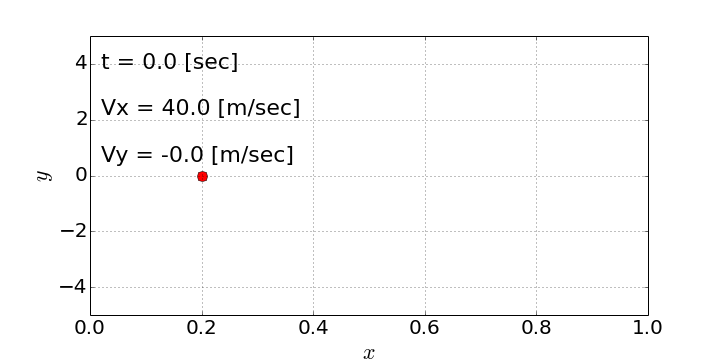
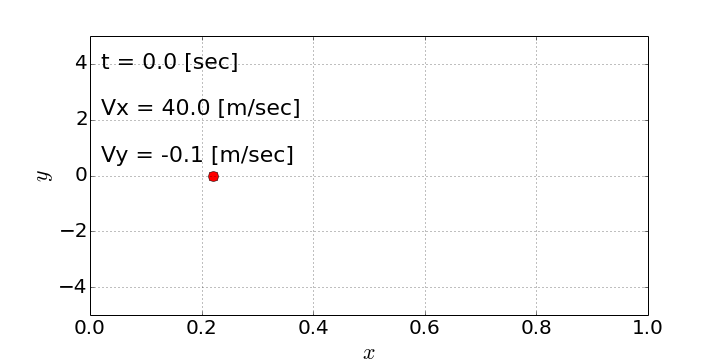
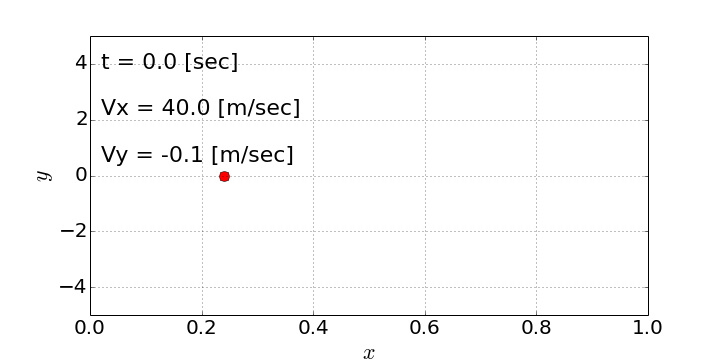
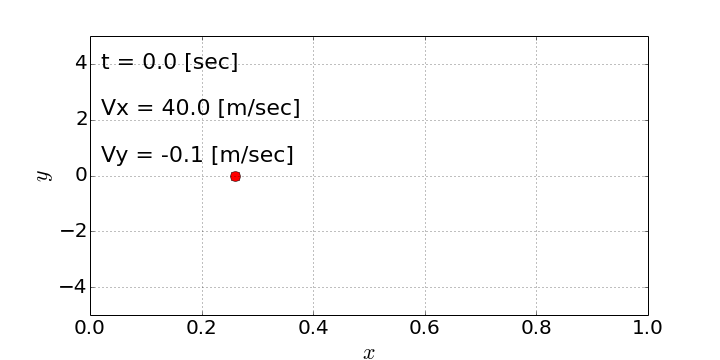
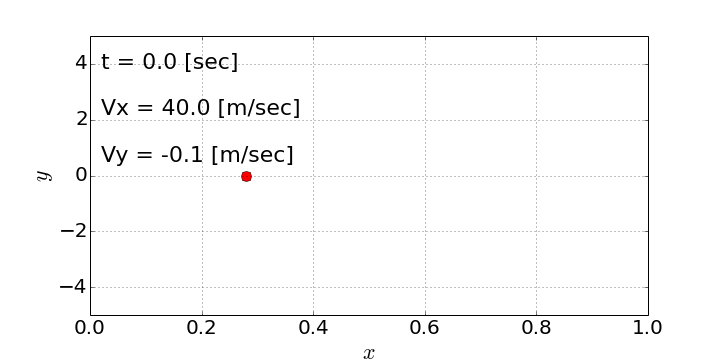
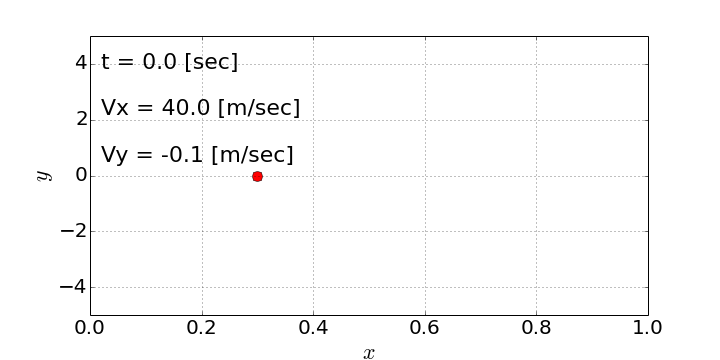
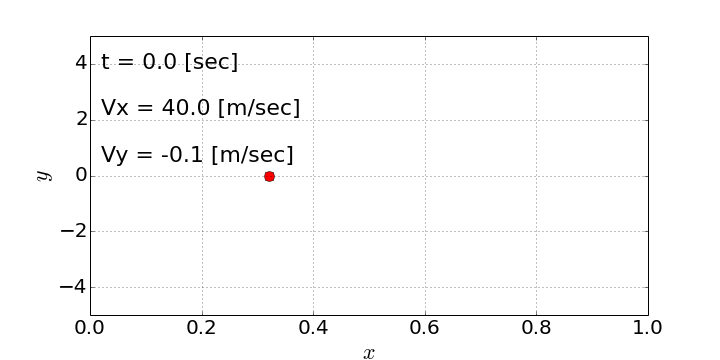
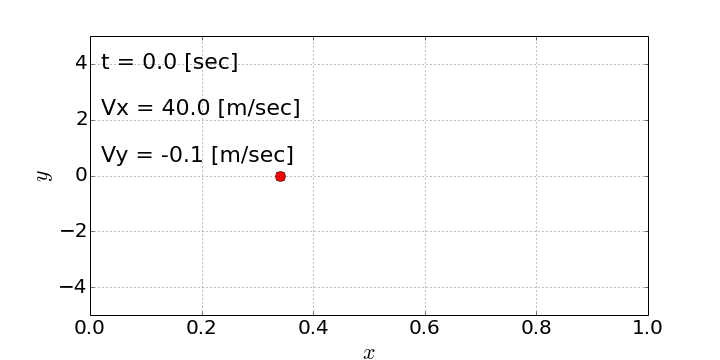
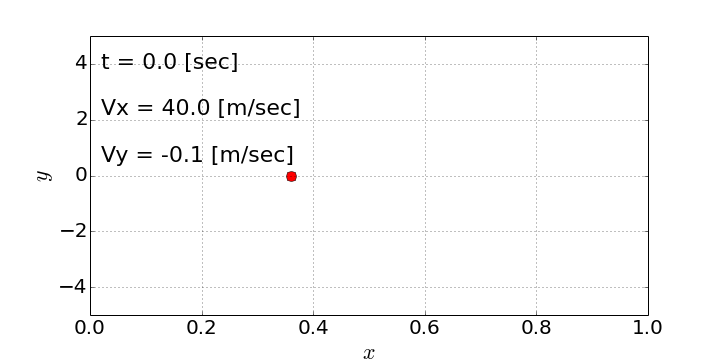
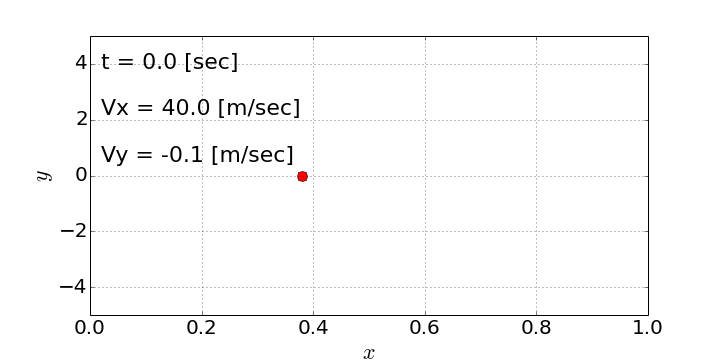
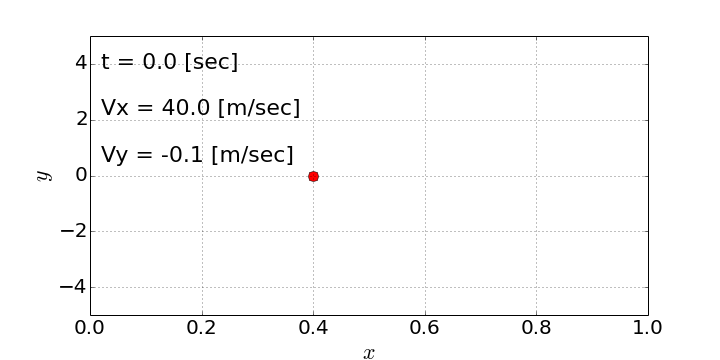
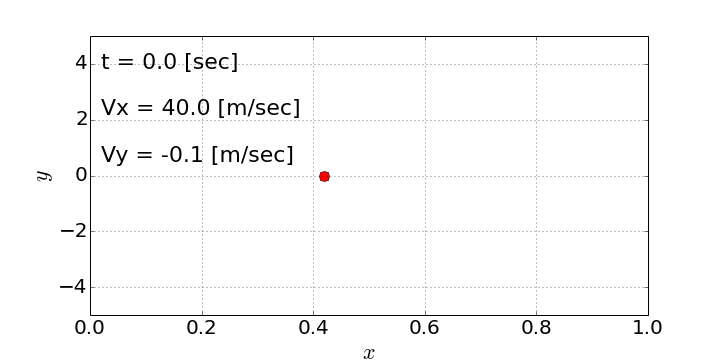
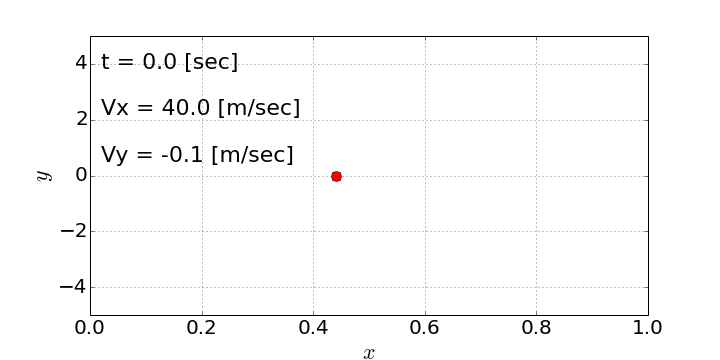
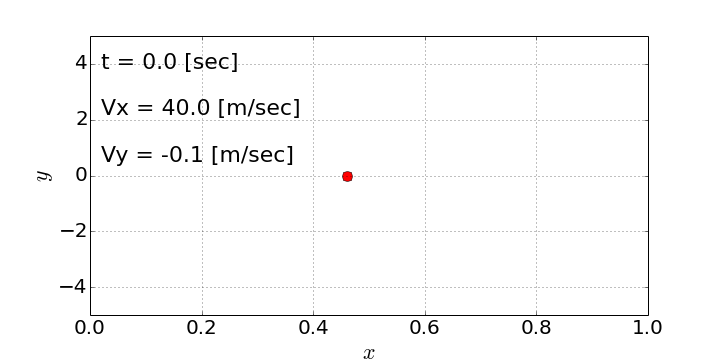
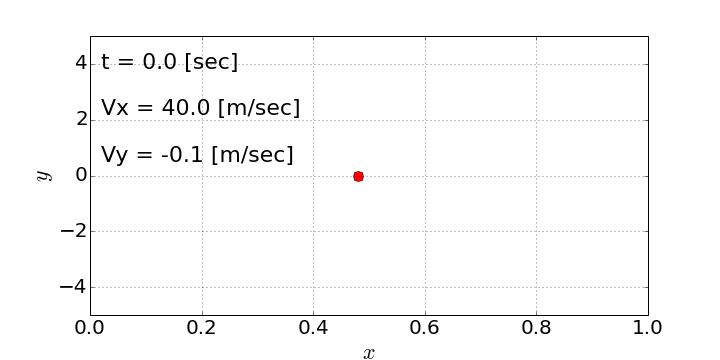
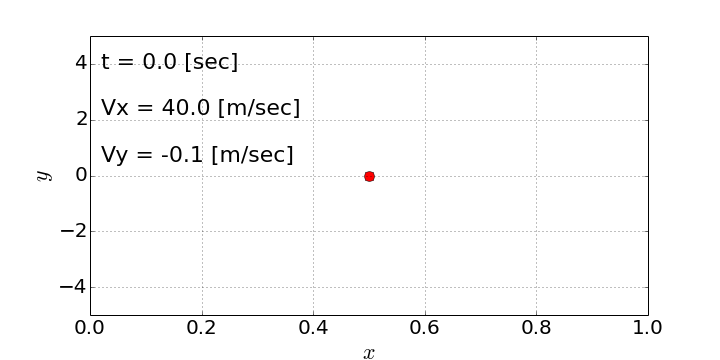
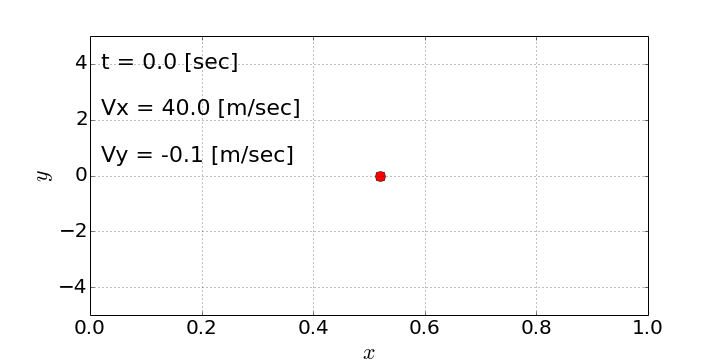
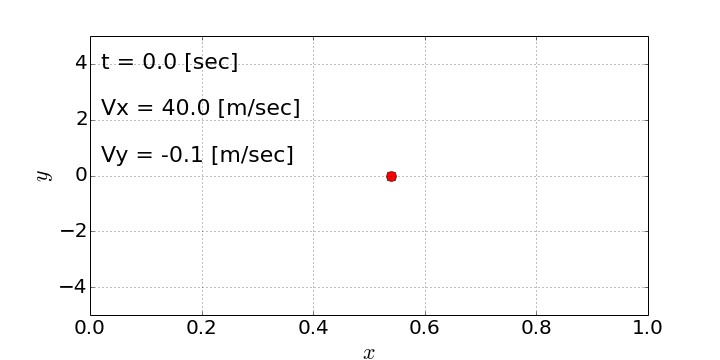
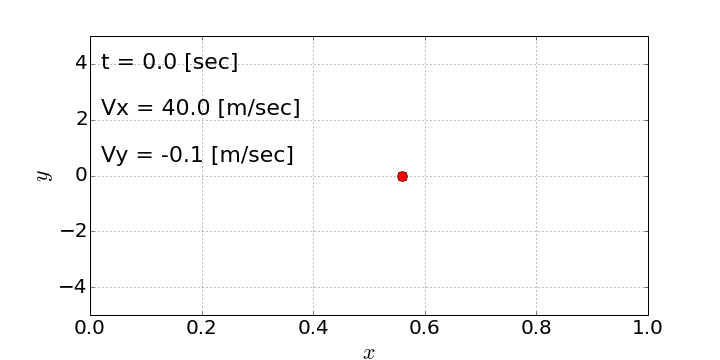
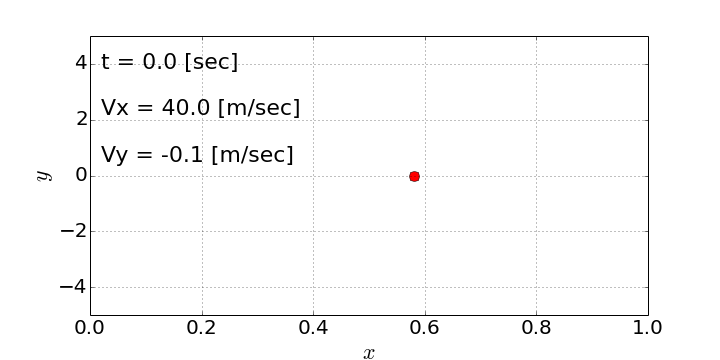
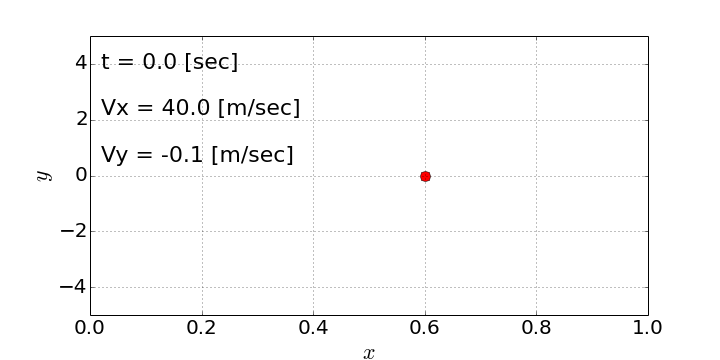
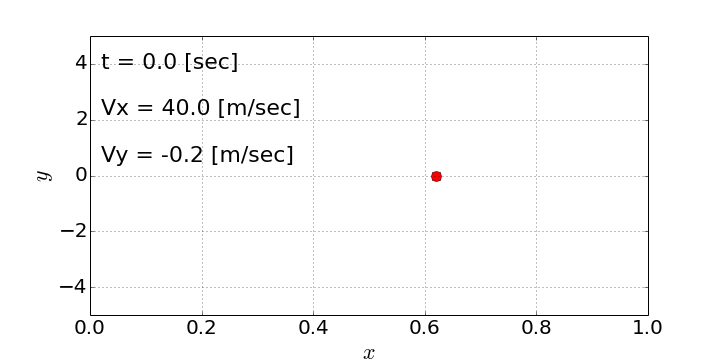
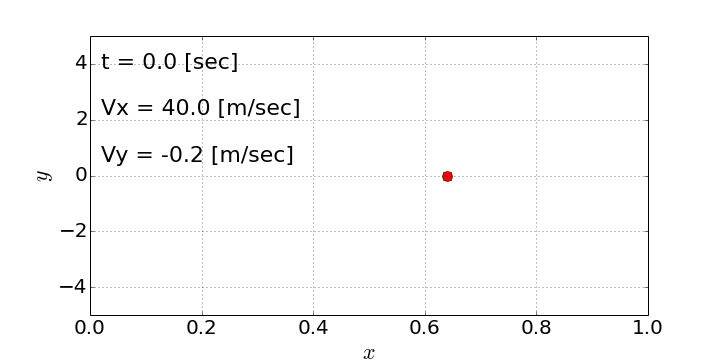
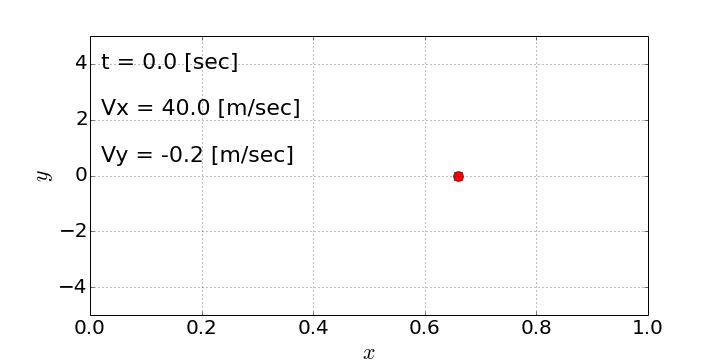
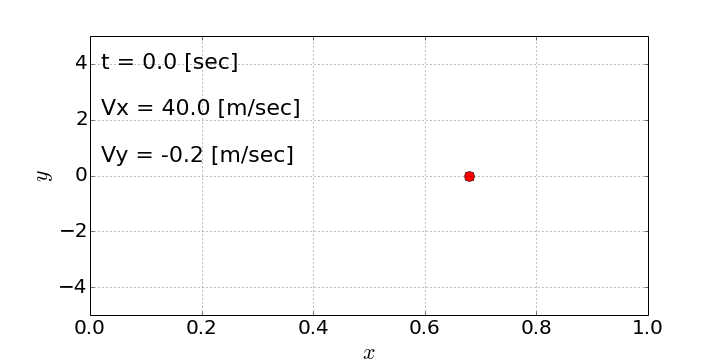
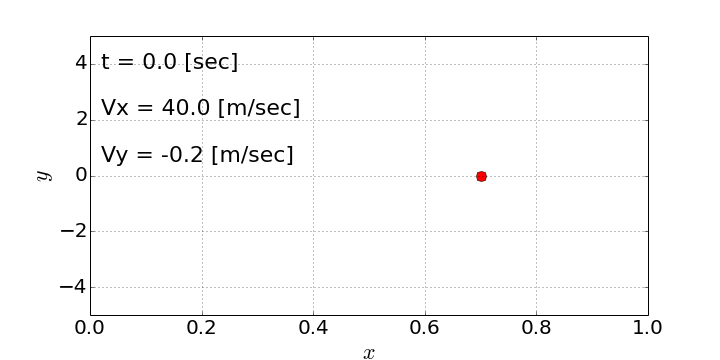
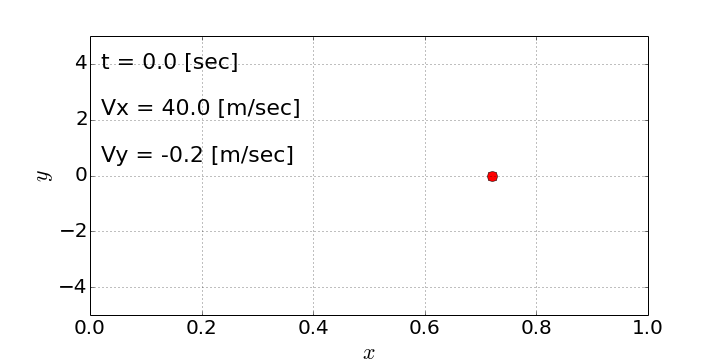
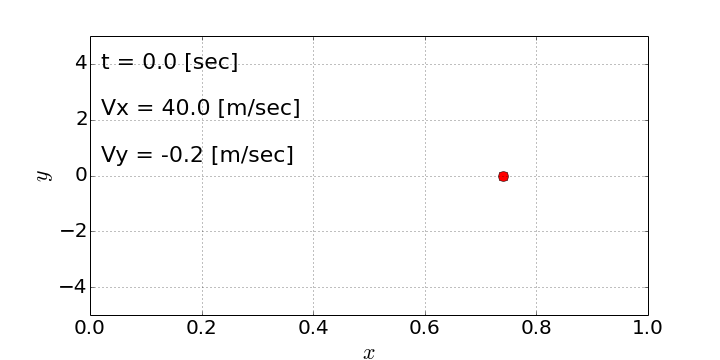
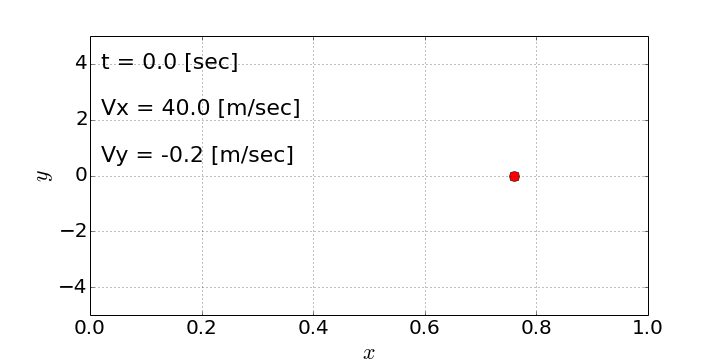
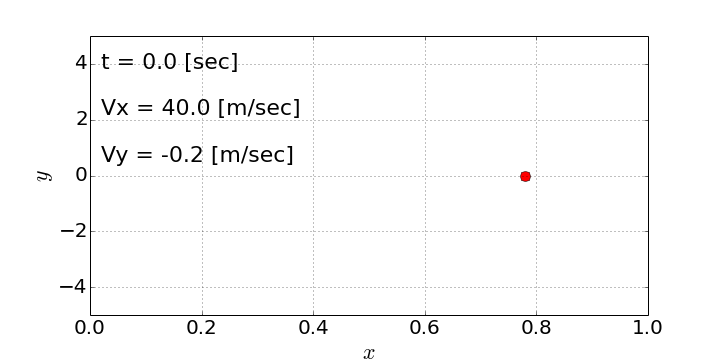
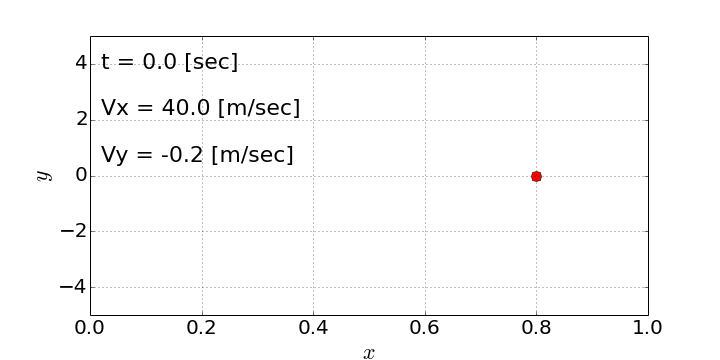
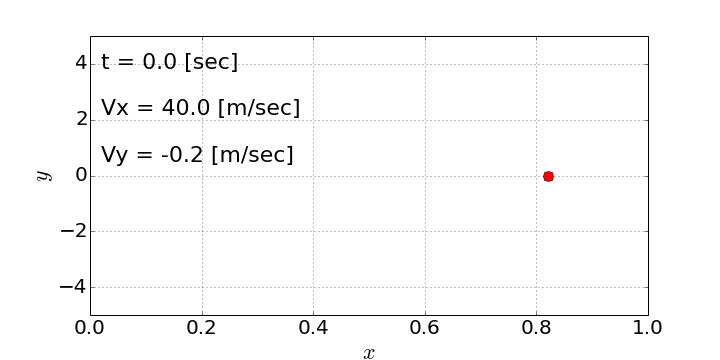
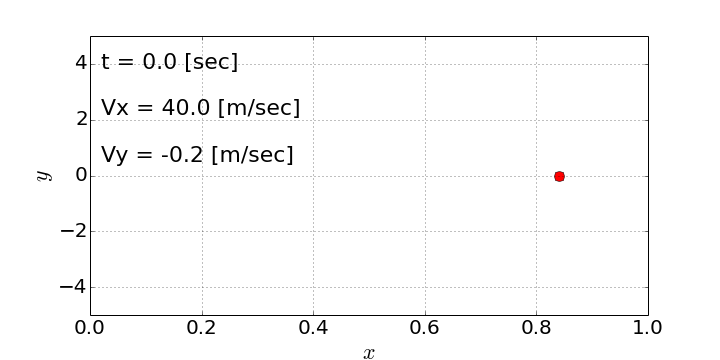
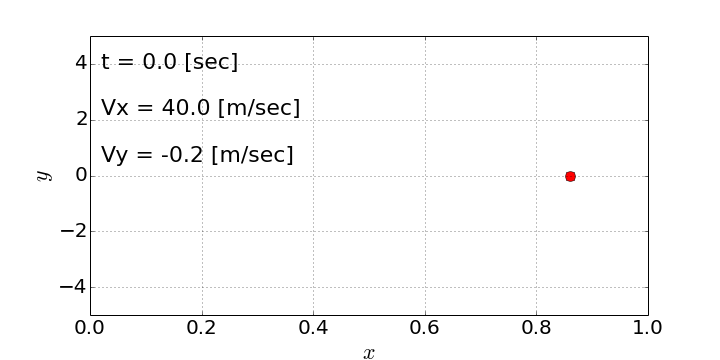
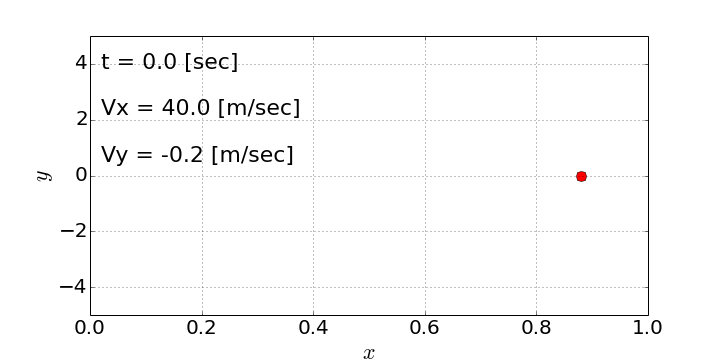
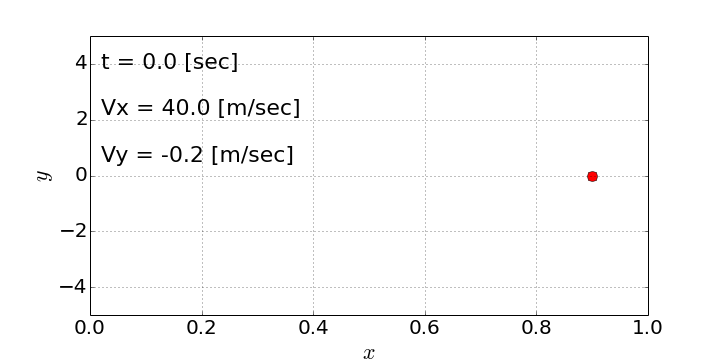
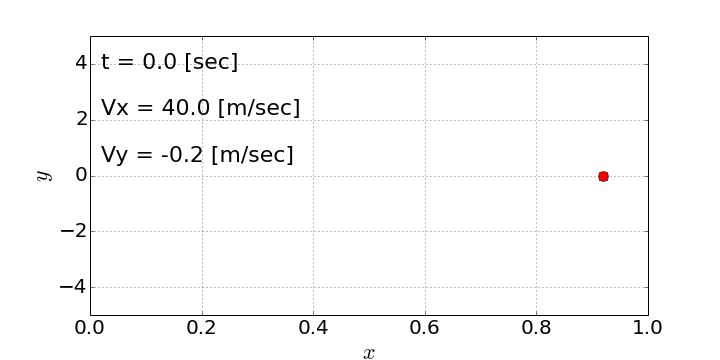
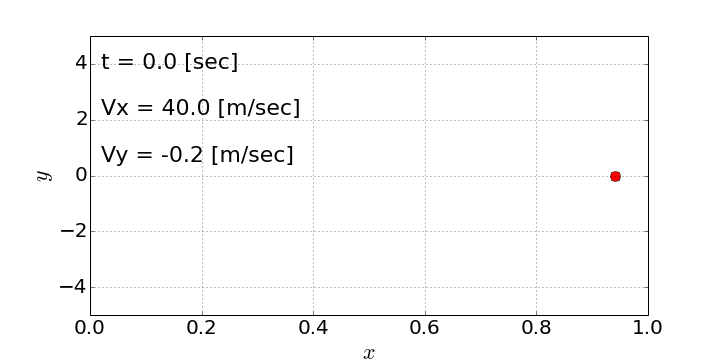
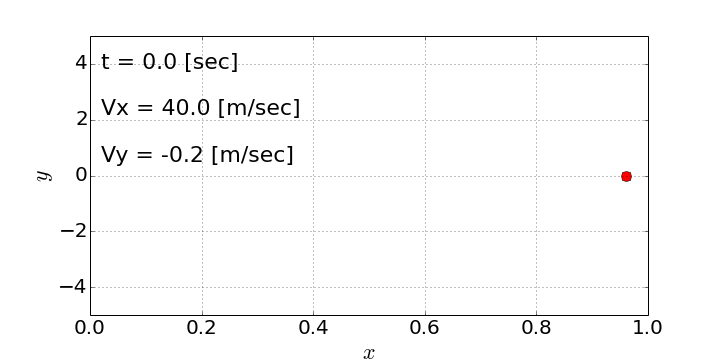
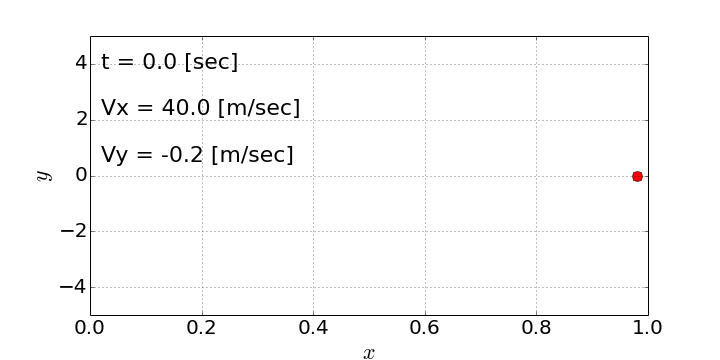
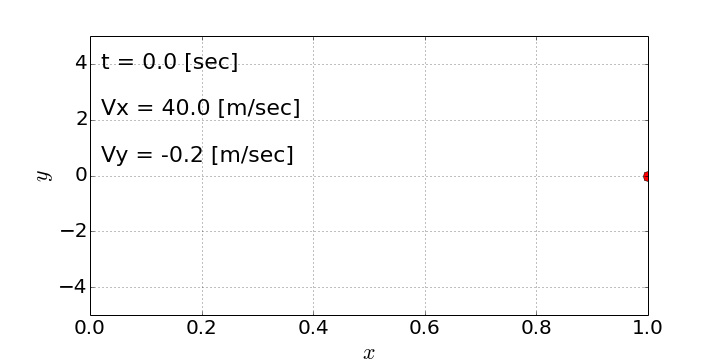

In [44]:
import matplotlib
import matplotlib.pyplot as plt
from JSAnimation import IPython_display
from matplotlib import animation
%matplotlib inline
# Plotting Jazz
%matplotlib inline
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)


fig01 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.gca()
ax.set_xlim([x_o, x_o + v_x_o * T])
if theta_o == 90:
    ax.set_xlim([x_o-5, x_o+5])
ax.set_ylim([y_o, y_o - 0.5 * g * (T/2.0) **2 + v_y_o * (T/2)])
if theta_o == 0:
    ax.set_ylim([y_o-5, y_o+5])
ax.set_title("", fontsize=30, y=1.05)
ax.set_xlabel('$x$', fontsize=22)
ax.set_ylabel('$y$', fontsize=22)

ax.grid()
teXt = ax.text(0.35, 1.05, '', transform=ax.transAxes)

colors = ['r', 'b']
numLine = 1
lines = [ax.plot([], [], 'o', markersize=10, color=colors[j])[0] for j in range(numLine)]
time_text = ax.text(0.02, 0.55, '', transform=ax.transAxes)

def init():
    for line in lines:
        line.set_data([],[])
        teXt.set_text('')

    return lines, teXt

def animate(i):
    lines[0].set_data(x[i], y[i])
    time_text.set_text('t = %.1f [sec] \n\nVx = %.1f [m/sec]\n\nVy = %.1f [m/sec]' % (t[i], v_x_o, -g * t[i] + v_y_o))
#     Vx_text.set_text('Vx = %.1f [m/sec]' % (v_x_o) )
#     Vy_text.set_text('Vx = %.1f [m/sec]' % (v_y_o) )
    return lines, time_text

animation.FuncAnimation(fig01, animate, init_func=init,
                        frames=len(t), interval=50, blit=True)
